# Practica 1 APC: Graduate Admission 2
## Predicting admission from important parameters

- #### Bruno Moya Ruiz - 1568176
- #### Marc Garrofé Urrutia - 
- #### Martí Simon Rojas - 1568180

# Apartat (C): Analitzant Dades
En aquest apartat analitzarem la nostra base de dades. Volem primer separar el input (X) del output (Y). En el nostre cas tenim 9 variables, de les quals la ultima es el nostre output, es a dir el resultat que volem obtenir del nostre model.

In [5]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('data/Admission_Predict_Ver1.1.csv')
data = dataset.values

x = data[:, :8]
y = data[:, 8]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (500, 9)
Dimensionalitat de les entrades X (500, 8)
Dimensionalitat de l'atribut Y (500,)


D'aqui veiem que la nostra base de dades presenta 500 elements. Ara mirarem si presenta valors no existents, es a dir que el seu valor sigui NaN. Aquests valors poden fer variar el resultat del nostre model i és important tenir-los en compte.

In [27]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())

Per comptar el nombre de valors no existents:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


Podem observar com el nostre dataset no presenta cap valor NaN.

In [28]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.500,4.500,9.650,1,0.920
1,2,324,107,4,4.000,4.500,8.870,1,0.760
2,3,316,104,3,3.000,3.500,8.000,1,0.720
3,4,322,110,3,3.500,2.500,8.670,1,0.800
4,5,314,103,2,2.000,3.000,8.210,0,0.650


Podem observar estadístiques de la nostra base de dades, com la desviació standard d'aquesta (std) , la mitjana de cada variable (mean) entre altres. Aixó ens serveix per descobrir quina distribució segueix cada variable i el seu tipus.

In [8]:
dataset.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000
mean,250.500,316.472,107.192,3.114,3.374,3.484,8.576,0.560,0.722
std,144.482,11.295,6.082,1.144,0.991,0.925,0.605,0.497,0.141
min,1.000,290.000,92.000,1.000,1.000,1.000,6.800,0.000,0.340
25%,125.750,308.000,103.000,2.000,2.500,3.000,8.128,0.000,0.630
50%,250.500,317.000,107.000,3.000,3.500,3.500,8.560,1.000,0.720
75%,375.250,325.000,112.000,4.000,4.000,4.000,9.040,1.000,0.820
max,500.000,340.000,120.000,5.000,5.000,5.000,9.920,1.000,0.970


Podem mostrar algun atribut del nostre dataset en format de grafica. En aquest cas mostrarem la atribut 0 (Serial No.)

<IPython.core.display.Javascript object>


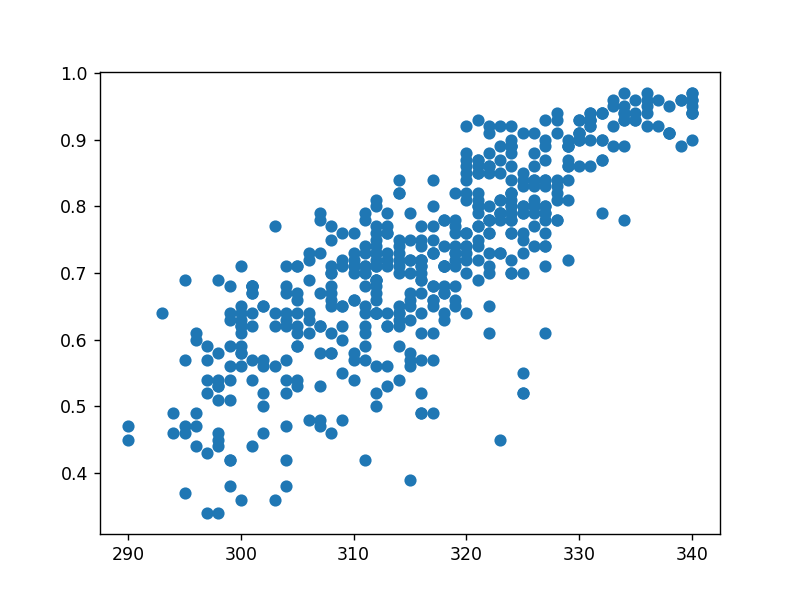

In [18]:
# mostrem atribut 0
plt.figure()

ax = plt.scatter(x[:,1], y)

<IPython.core.display.Javascript object>


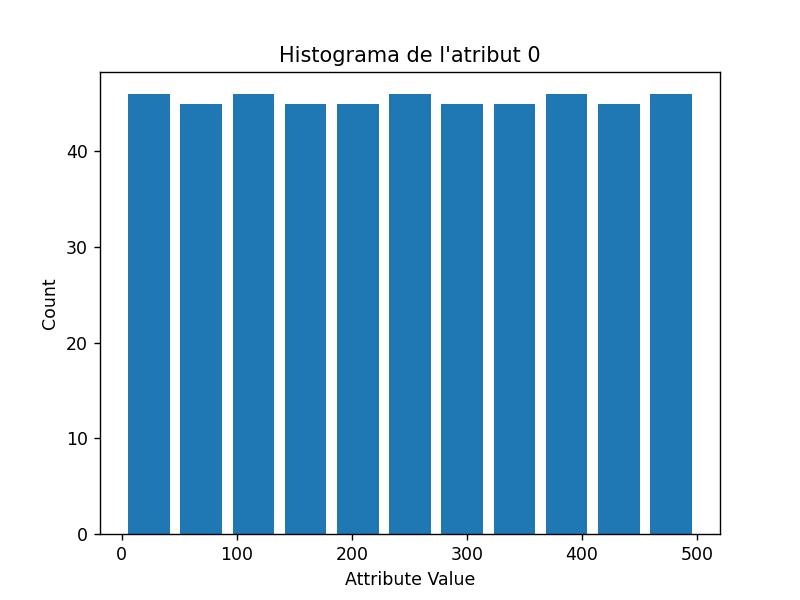

In [29]:
plt.figure()
plt.title("Histograma de l'atribut 0")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,0], bins=11, range=[np.min(x[:,0]), np.max(x[:,0])], histtype="bar", rwidth=0.8)


Aquest histograma ens permet observar si presenta una distribució Gaussiana. Per exemple, el nostre atribut 0 no presenta una distribució Gaussiana. També podem estudiar la correlació entre els diferents atributs per tal de saber si estan correlacionats entre ells. Aixo ens sera util per observar quins atributs tenen més pes.

<IPython.core.display.Javascript object>


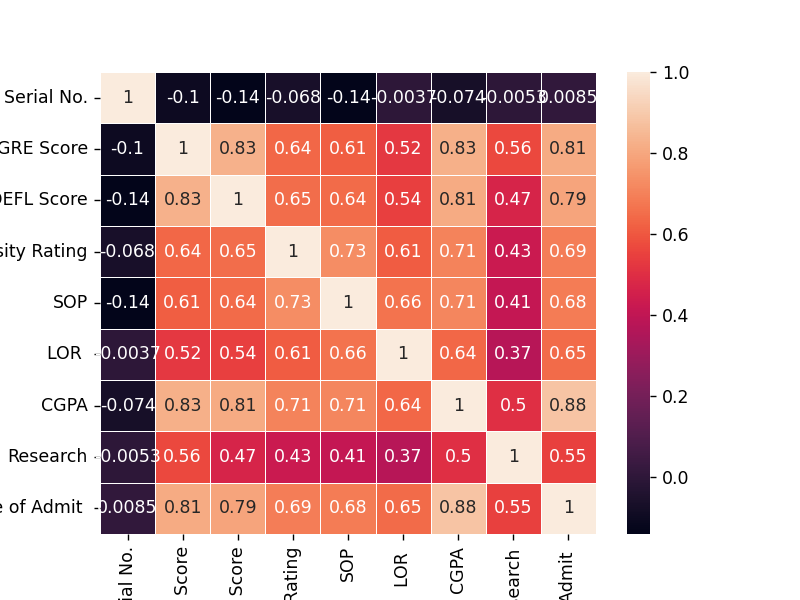

In [16]:
import seaborn as sns

# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.figure()

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

Podem observar pel heatmap, que gariebe tots els atributs estan relacionats amb un grau per sobre del 65% amb el nostre output menys el atribut research que es el menys relacionat, i per tant potser un dels possibles a descartar en un futur. També podem utilitzar la funció pairplot per tal de veure els atributs que estan relacionats entre si. Pero la relació que ens interessa observar es la dels atributs amb l'ultim atribut ja que es la sortida, podent així observar quin atribut esta més relacionat amb la sortida.

<IPython.core.display.Javascript object>


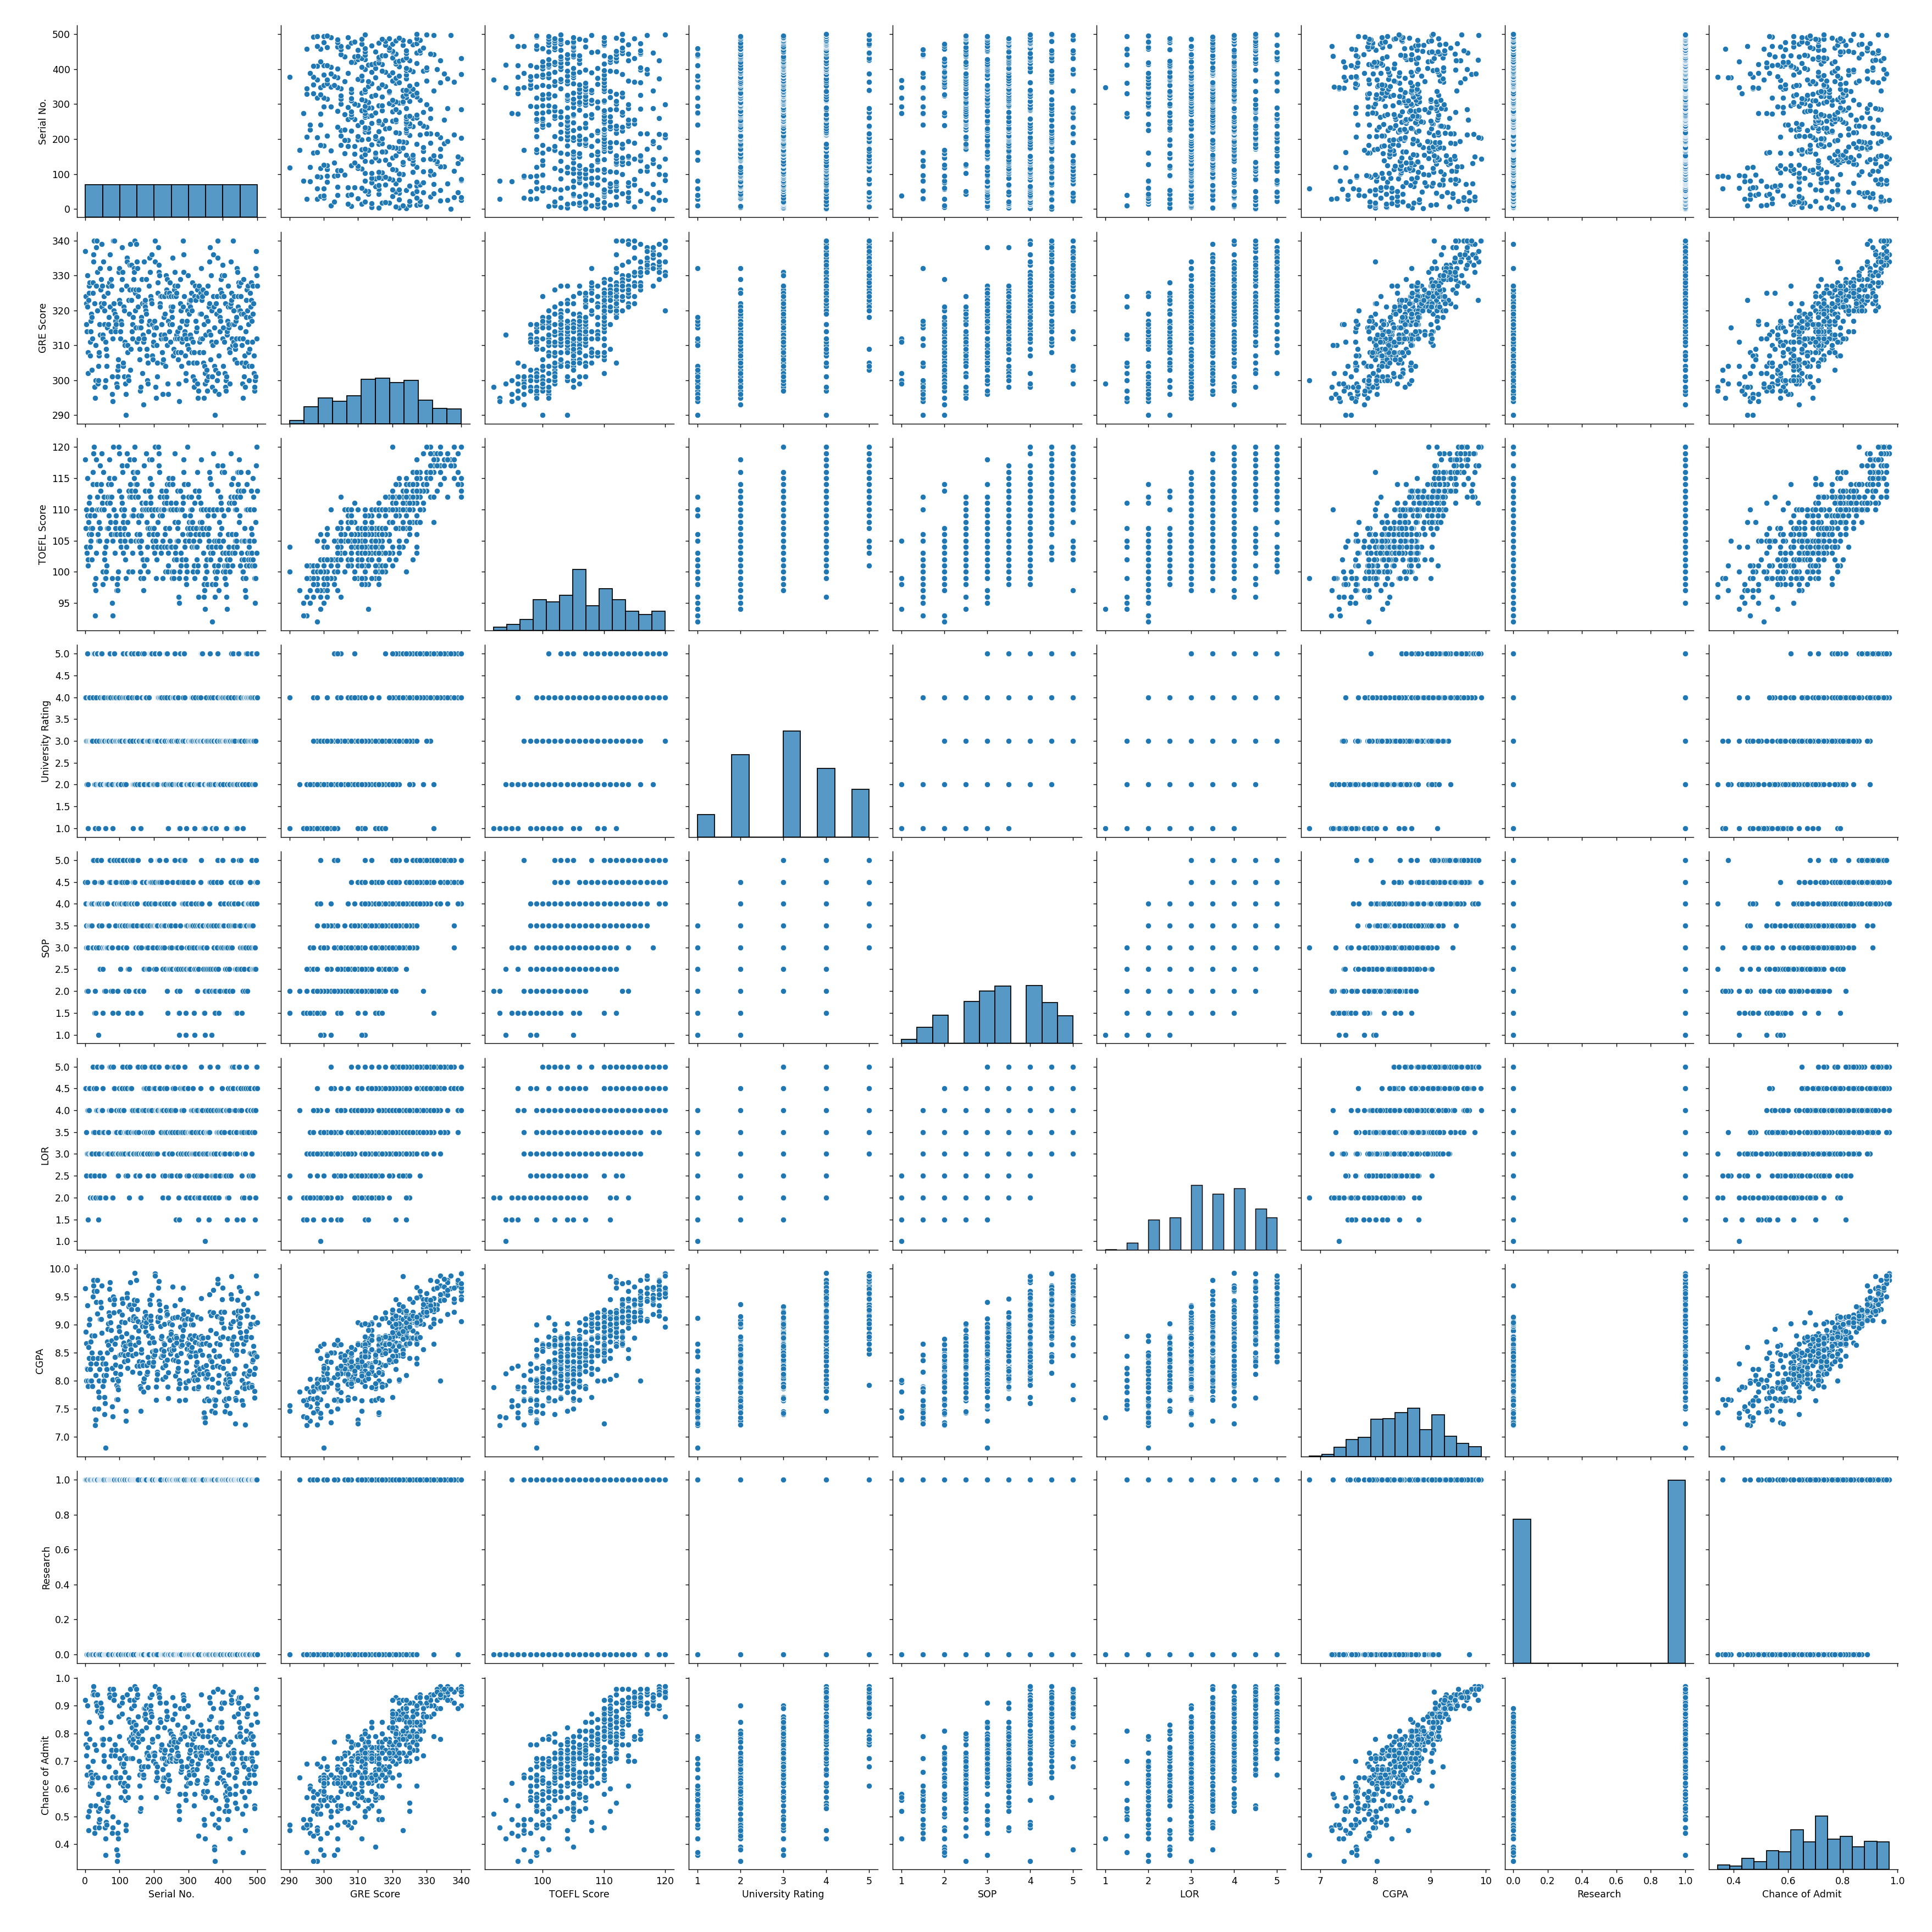

In [17]:
# Mirem la relació entre atributs utilitzant la funció pairplot
relacio = sns.pairplot(dataset)

Així doncs ara podreu respondre a les següents preguntes:

Quin és el tipus de cada atribut?

- Serial No.: Numeros enters entre 0 i 500 
- GRE Score : Numeros enters entre 290 i 340 
- TOEFL Score : Numeros enters entre 92 i 120 
- University Rating : Numeros enters entre 1 i 5 
- SOP : Numeros enters entre 1 i 5
- LOR : Numeros enters entre 1 i 5
- CGPA : Numeros decimals entre 6.8 i 9.92
- Research : Numero binari, 0 i 1
- Chance of Admit : Percentatge entre 0 i 100% 

Quins atributs tenen una distribució Guassiana?

Podem observar per les grafiques de barres que els atributs amb distribució Gaussiana son:

- GRE Score
- TOEFL Score
- University Rating
- CGPA

Quin és l'atribut objectiu? Per què?
- El nostre objectiu es predir el tant percent de possibilitat d'admissió a la universitat en la India. Per tant podem dir que la nostra variable objectiu a predir sera la ultima, Chance of Admit. 